Test application of 1 proximity-based method and 1 reconstruction-based method.

Calculation of f1, precision and recall for each method.
Evaluating the quality of anomaly detection models without using real target values

In [15]:
ANOMALY_FREE_DATA = 'anomaly-free.csv'
VALVE1 = 'valve1/1.csv'
VALVE2 = 'valve2/1.csv'

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [17]:
df = pd.read_csv(ANOMALY_FREE_DATA, sep=';')
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9405 entries, 0 to 9404
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             9405 non-null   datetime64[ns]
 1   Accelerometer1RMS    9405 non-null   float64       
 2   Accelerometer2RMS    9405 non-null   float64       
 3   Current              9405 non-null   float64       
 4   Pressure             9405 non-null   float64       
 5   Temperature          9405 non-null   float64       
 6   Thermocouple         9405 non-null   float64       
 7   Voltage              9405 non-null   float64       
 8   Volume Flow RateRMS  9405 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 661.4 KB


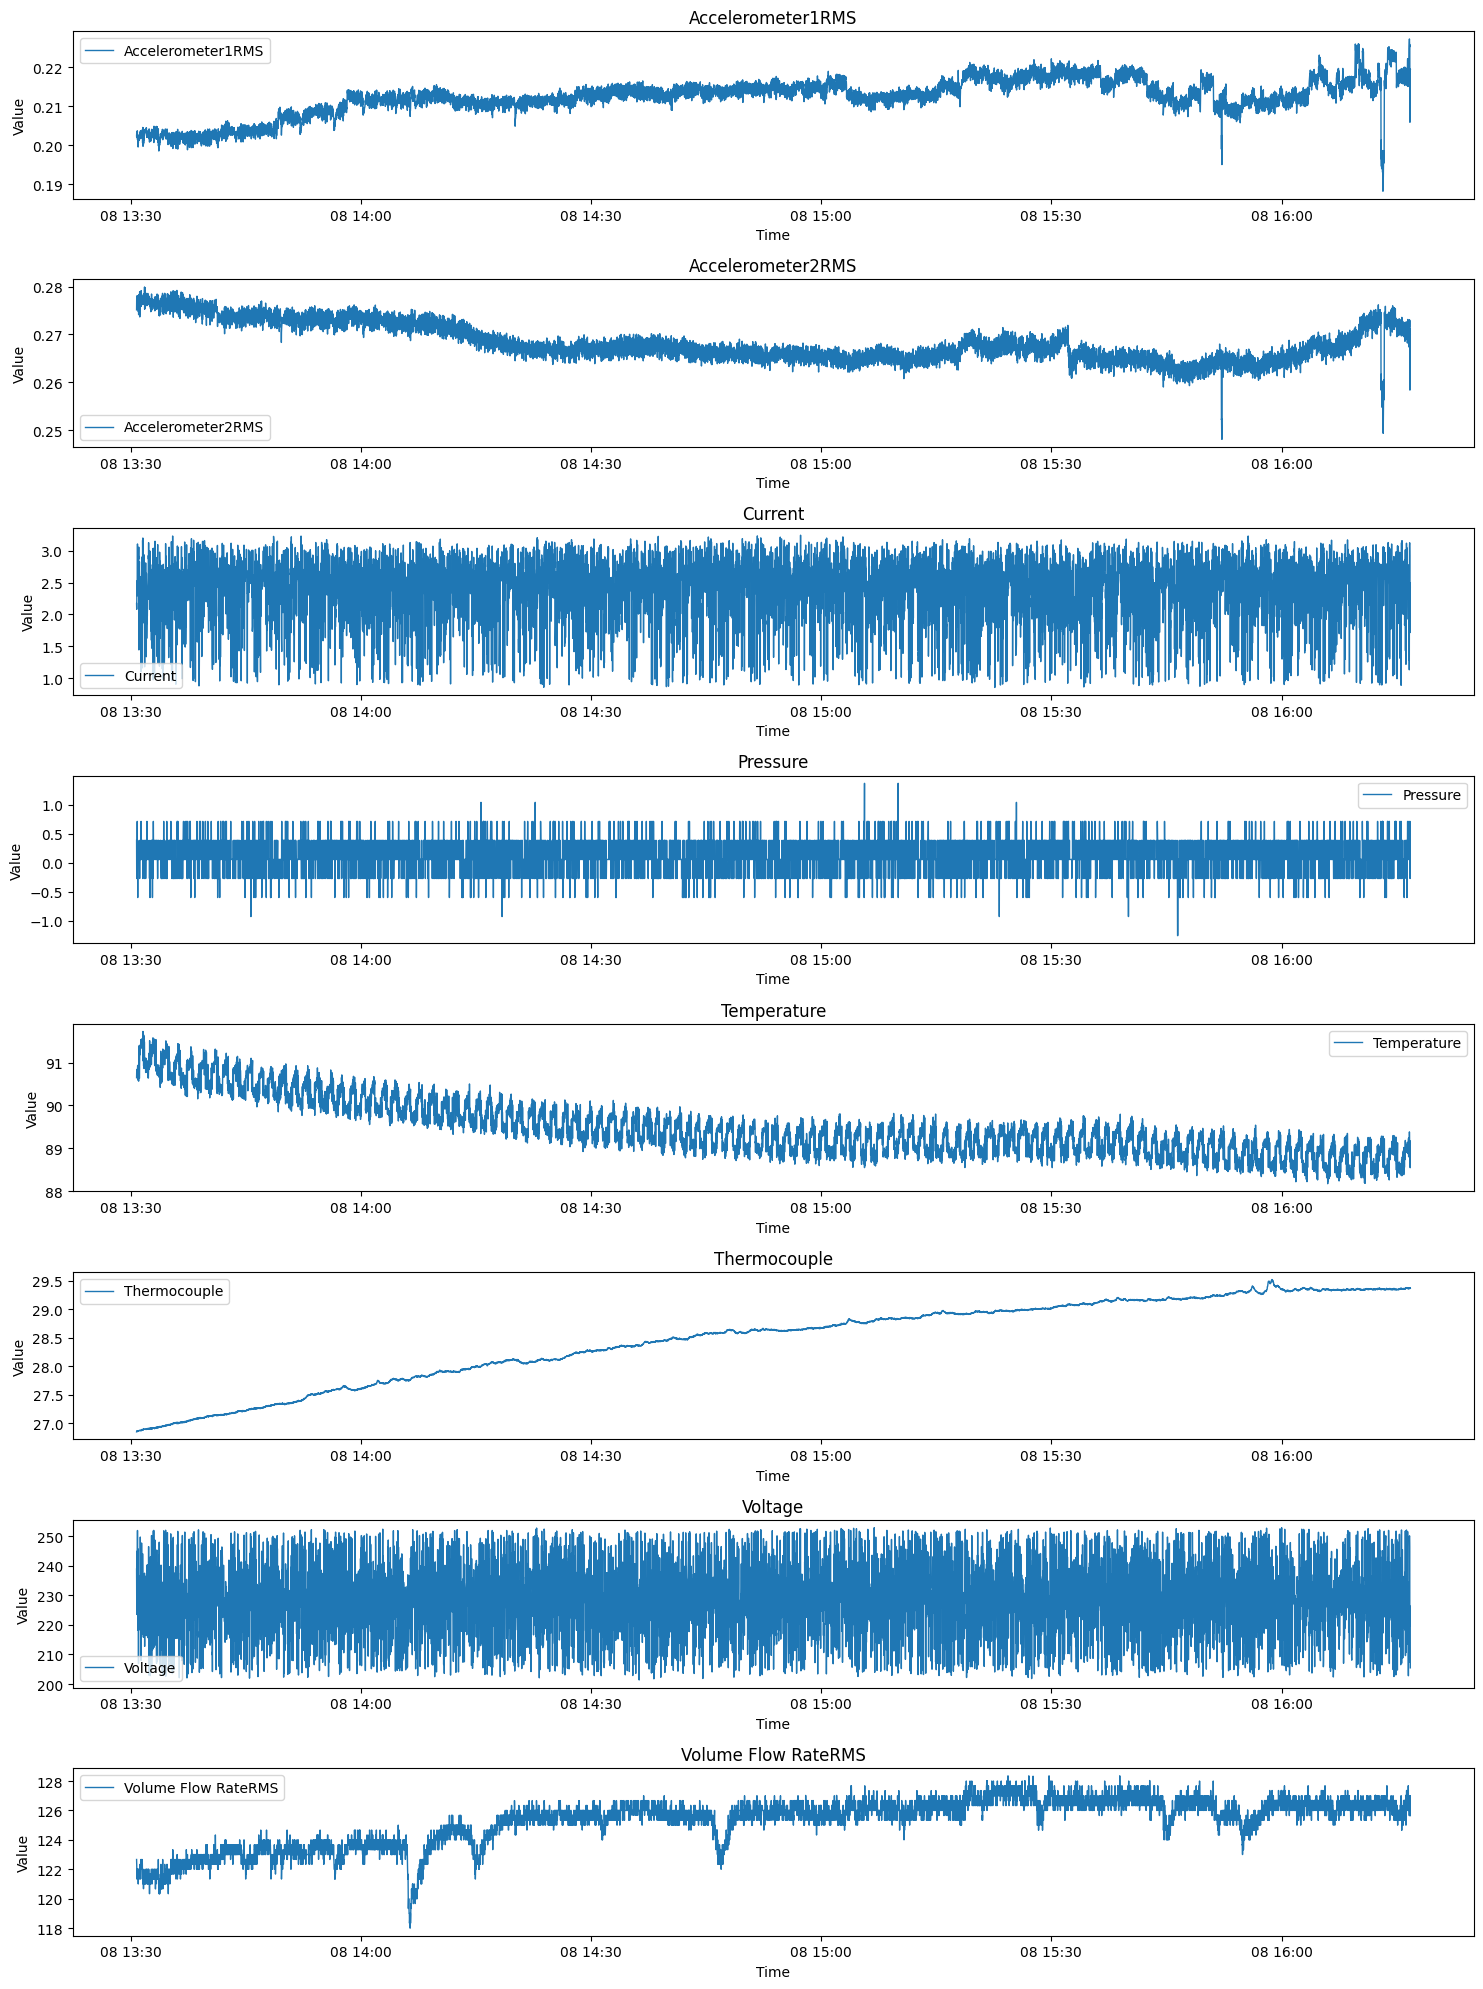

In [18]:
plt.figure(figsize=(15, 20))

features_to_plot = ['Accelerometer1RMS', 'Accelerometer2RMS', 'Current', 'Pressure', 'Temperature', 'Thermocouple', 'Voltage', 'Volume Flow RateRMS']
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(len(features_to_plot), 1, i)
    plt.plot(df['datetime'], df[feature], label=feature, linewidth=1)
    plt.title(feature)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             1145 non-null   datetime64[ns]
 1   Accelerometer1RMS    1145 non-null   float64       
 2   Accelerometer2RMS    1145 non-null   float64       
 3   Current              1145 non-null   float64       
 4   Pressure             1145 non-null   float64       
 5   Temperature          1145 non-null   float64       
 6   Thermocouple         1145 non-null   float64       
 7   Voltage              1145 non-null   float64       
 8   Volume Flow RateRMS  1145 non-null   float64       
 9   anomaly              1145 non-null   float64       
 10  changepoint          1145 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 98.5 KB


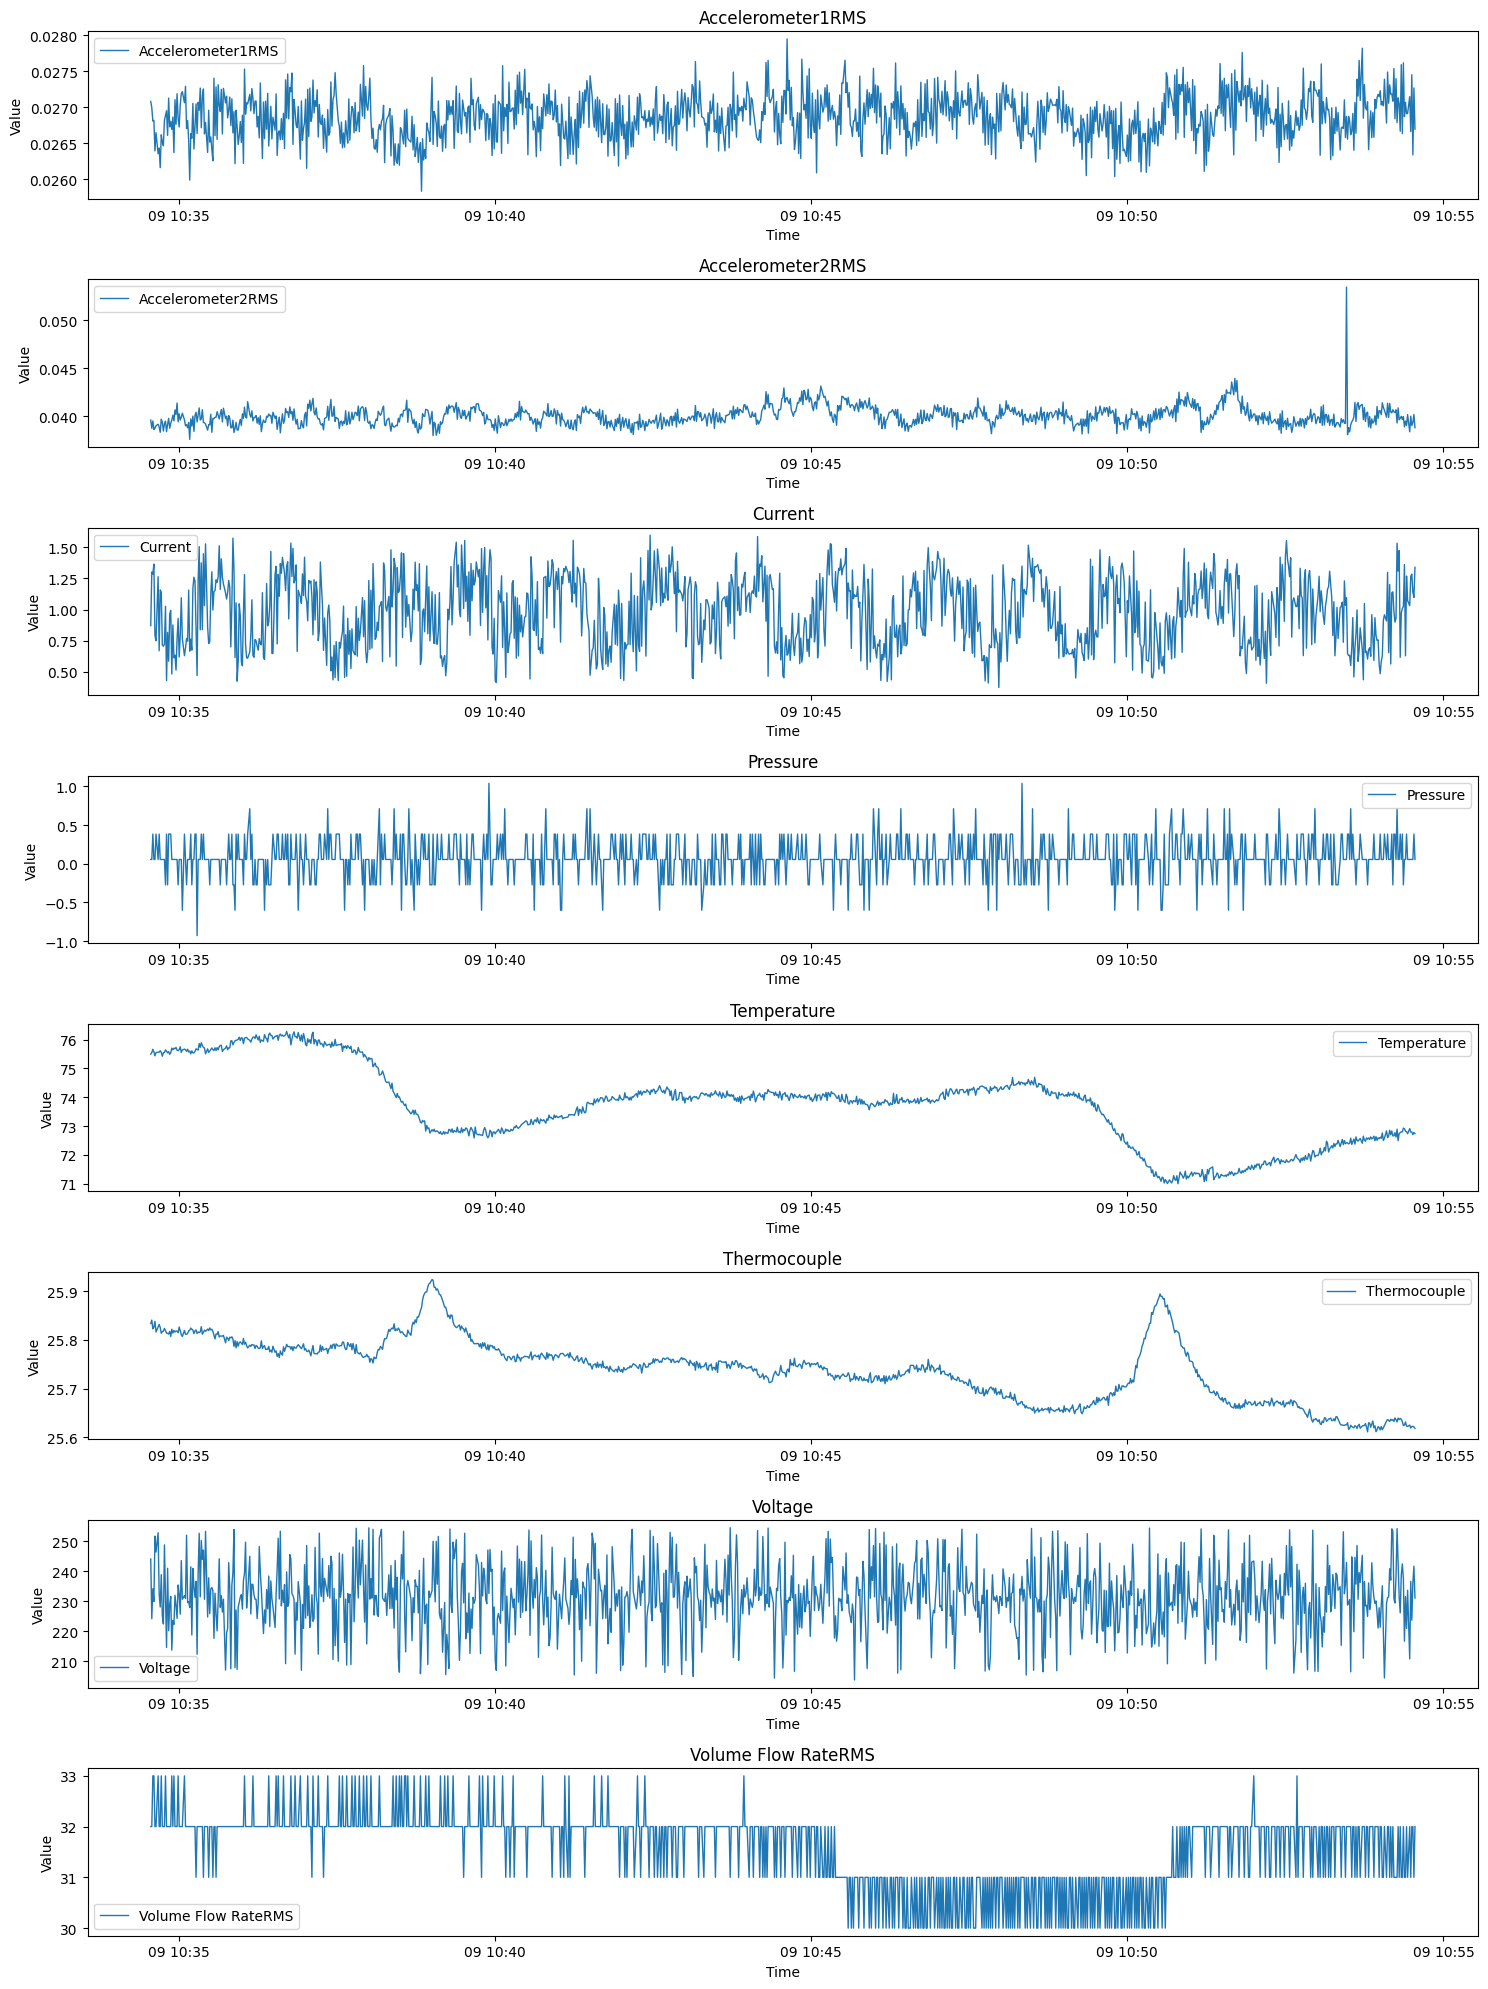

In [19]:
#test data
valve1_df = pd.read_csv(VALVE1, sep=';')
valve1_df['datetime'] = pd.to_datetime(valve1_df['datetime'])
valve1_df.info()

plt.figure(figsize=(15, 20))

features_to_plot = ['Accelerometer1RMS', 'Accelerometer2RMS', 'Current', 'Pressure', 'Temperature', 'Thermocouple', 'Voltage', 'Volume Flow RateRMS']
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(len(features_to_plot), 1, i)
    plt.plot(valve1_df['datetime'], valve1_df[feature], label=feature, linewidth=1)
    plt.title(feature)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()


# Proximity-based method (DBSCAN)


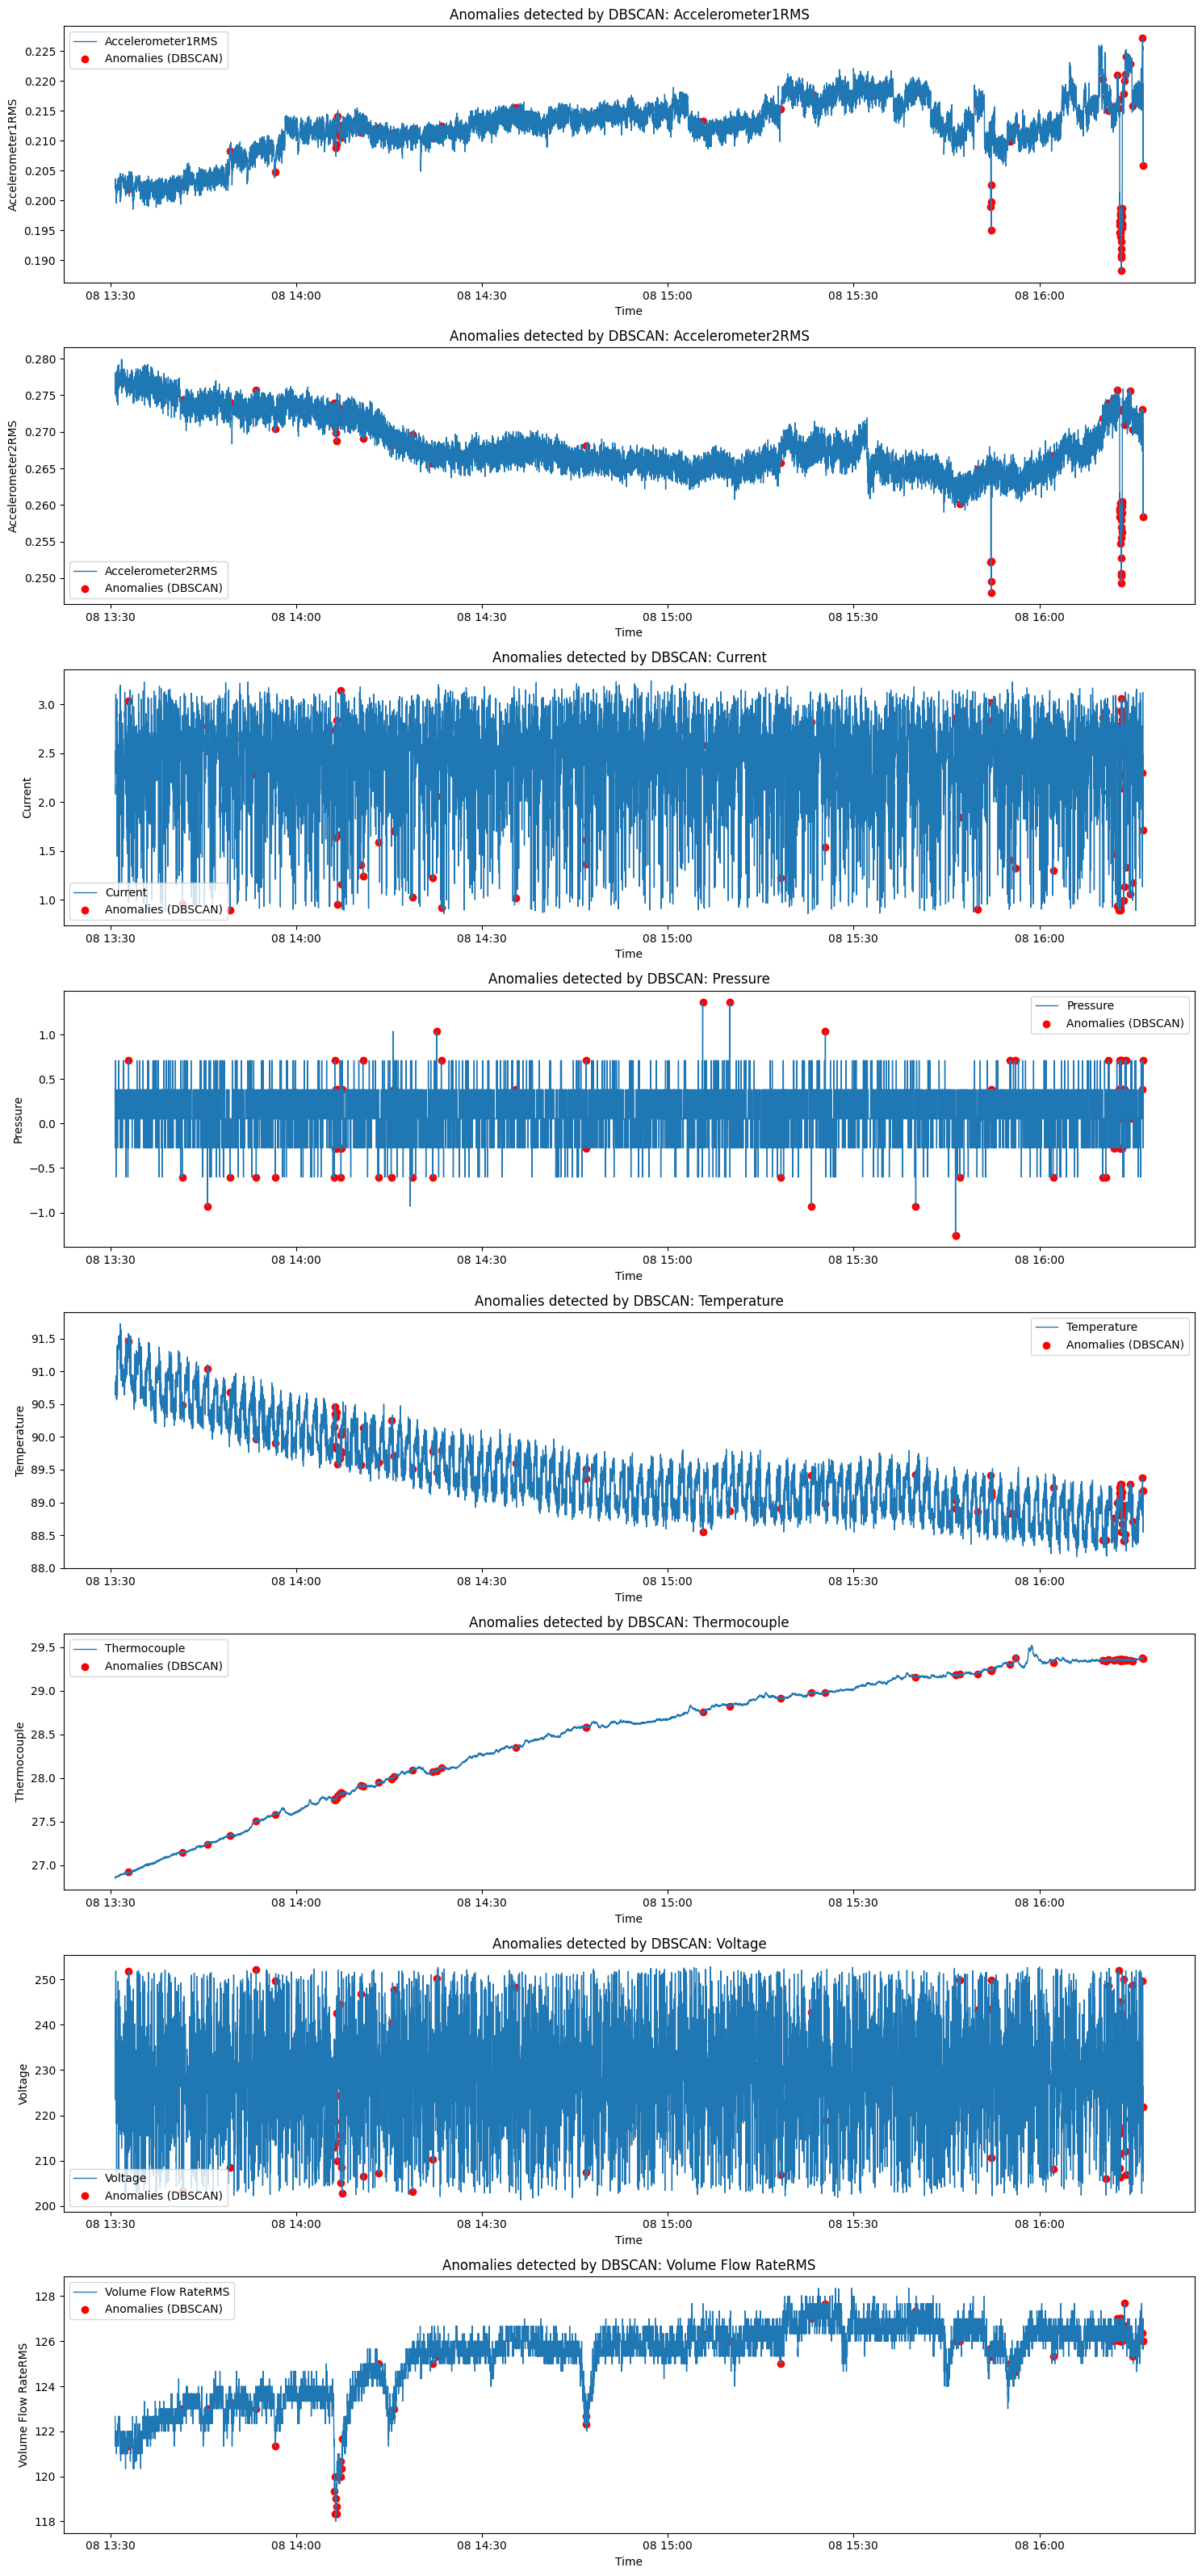

In [20]:
# from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

numerical_data = df[['Accelerometer1RMS', 'Accelerometer2RMS', 'Current', 'Pressure', 'Temperature', 'Thermocouple', 'Voltage', 'Volume Flow RateRMS']]
# knn = NearestNeighbors(n_neighbors=5)
# knn.fit(numerical_data)

# distances, _ = knn.kneighbors(numerical_data)
# avg_distances = distances.mean(axis=1)

# threshold = np.percentile(avg_distances, 95)
# anomalies_knn = avg_distances > threshold

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

dbscan = DBSCAN(eps=1.5, min_samples=10)  # eps и min_samples for customization
clusters = dbscan.fit_predict(scaled_data)

anomalies_dbscan = clusters == -1

plt.figure(figsize=(15, len(numerical_data.columns) * 4))

for i, feature in enumerate(numerical_data.columns, 1):
    plt.subplot(len(numerical_data.columns), 1, i)
    plt.plot(df['datetime'], df[feature], label=feature, linewidth=1)
    plt.scatter(
        df['datetime'][anomalies_dbscan],
        df[feature][anomalies_dbscan],
        color='red',
        label='Anomalies (DBSCAN)'
    )
    plt.title(f"Anomalies detected by DBSCAN: {feature}")
    plt.xlabel("Time")
    plt.ylabel(feature)
    plt.legend()

plt.tight_layout()
plt.show()


The method gives a more selective assessment of anomalies, compared to knn with a high number of false positives

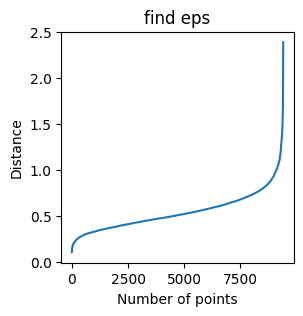

In [28]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(scaled_data)
distances, _ = nbrs.kneighbors(scaled_data)
avg_distances = distances[:, 1]

# Graph for Neighbors
plt.figure(figsize=(3, 3))
plt.plot(sorted(avg_distances))
plt.xlabel('Number of points')
plt.ylabel('Distance')
plt.title('find eps')
plt.show()

In general, eps = 1.5 corresponds to the plot of knn

In [22]:
valve1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             1145 non-null   datetime64[ns]
 1   Accelerometer1RMS    1145 non-null   float64       
 2   Accelerometer2RMS    1145 non-null   float64       
 3   Current              1145 non-null   float64       
 4   Pressure             1145 non-null   float64       
 5   Temperature          1145 non-null   float64       
 6   Thermocouple         1145 non-null   float64       
 7   Voltage              1145 non-null   float64       
 8   Volume Flow RateRMS  1145 non-null   float64       
 9   anomaly              1145 non-null   float64       
 10  changepoint          1145 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 98.5 KB


In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

# We use the already trained DBSCAN model for the test data
train_numerical_columns = ['Accelerometer1RMS', 'Accelerometer2RMS', 'Current', 'Pressure', 'Temperature', 'Thermocouple', 'Voltage', 'Volume Flow RateRMS']

scaled_test_data = scaler.transform(valve1_df[train_numerical_columns])

dbscan_test = DBSCAN(eps=1.4, min_samples=10)
test_clusters = dbscan_test.fit_predict(scaled_test_data)
test_anomalies = test_clusters == -1  # Anomaly tags -1

# Comparison with tags 'anomaly'
true_anomalies = valve1_df['anomaly'] == 1

precision = precision_score(true_anomalies, test_anomalies)
recall = recall_score(true_anomalies, test_anomalies)
f1 = f1_score(true_anomalies, test_anomalies)

precision, recall, f1


(0.43902439024390244, 0.04477611940298507, 0.08126410835214447)

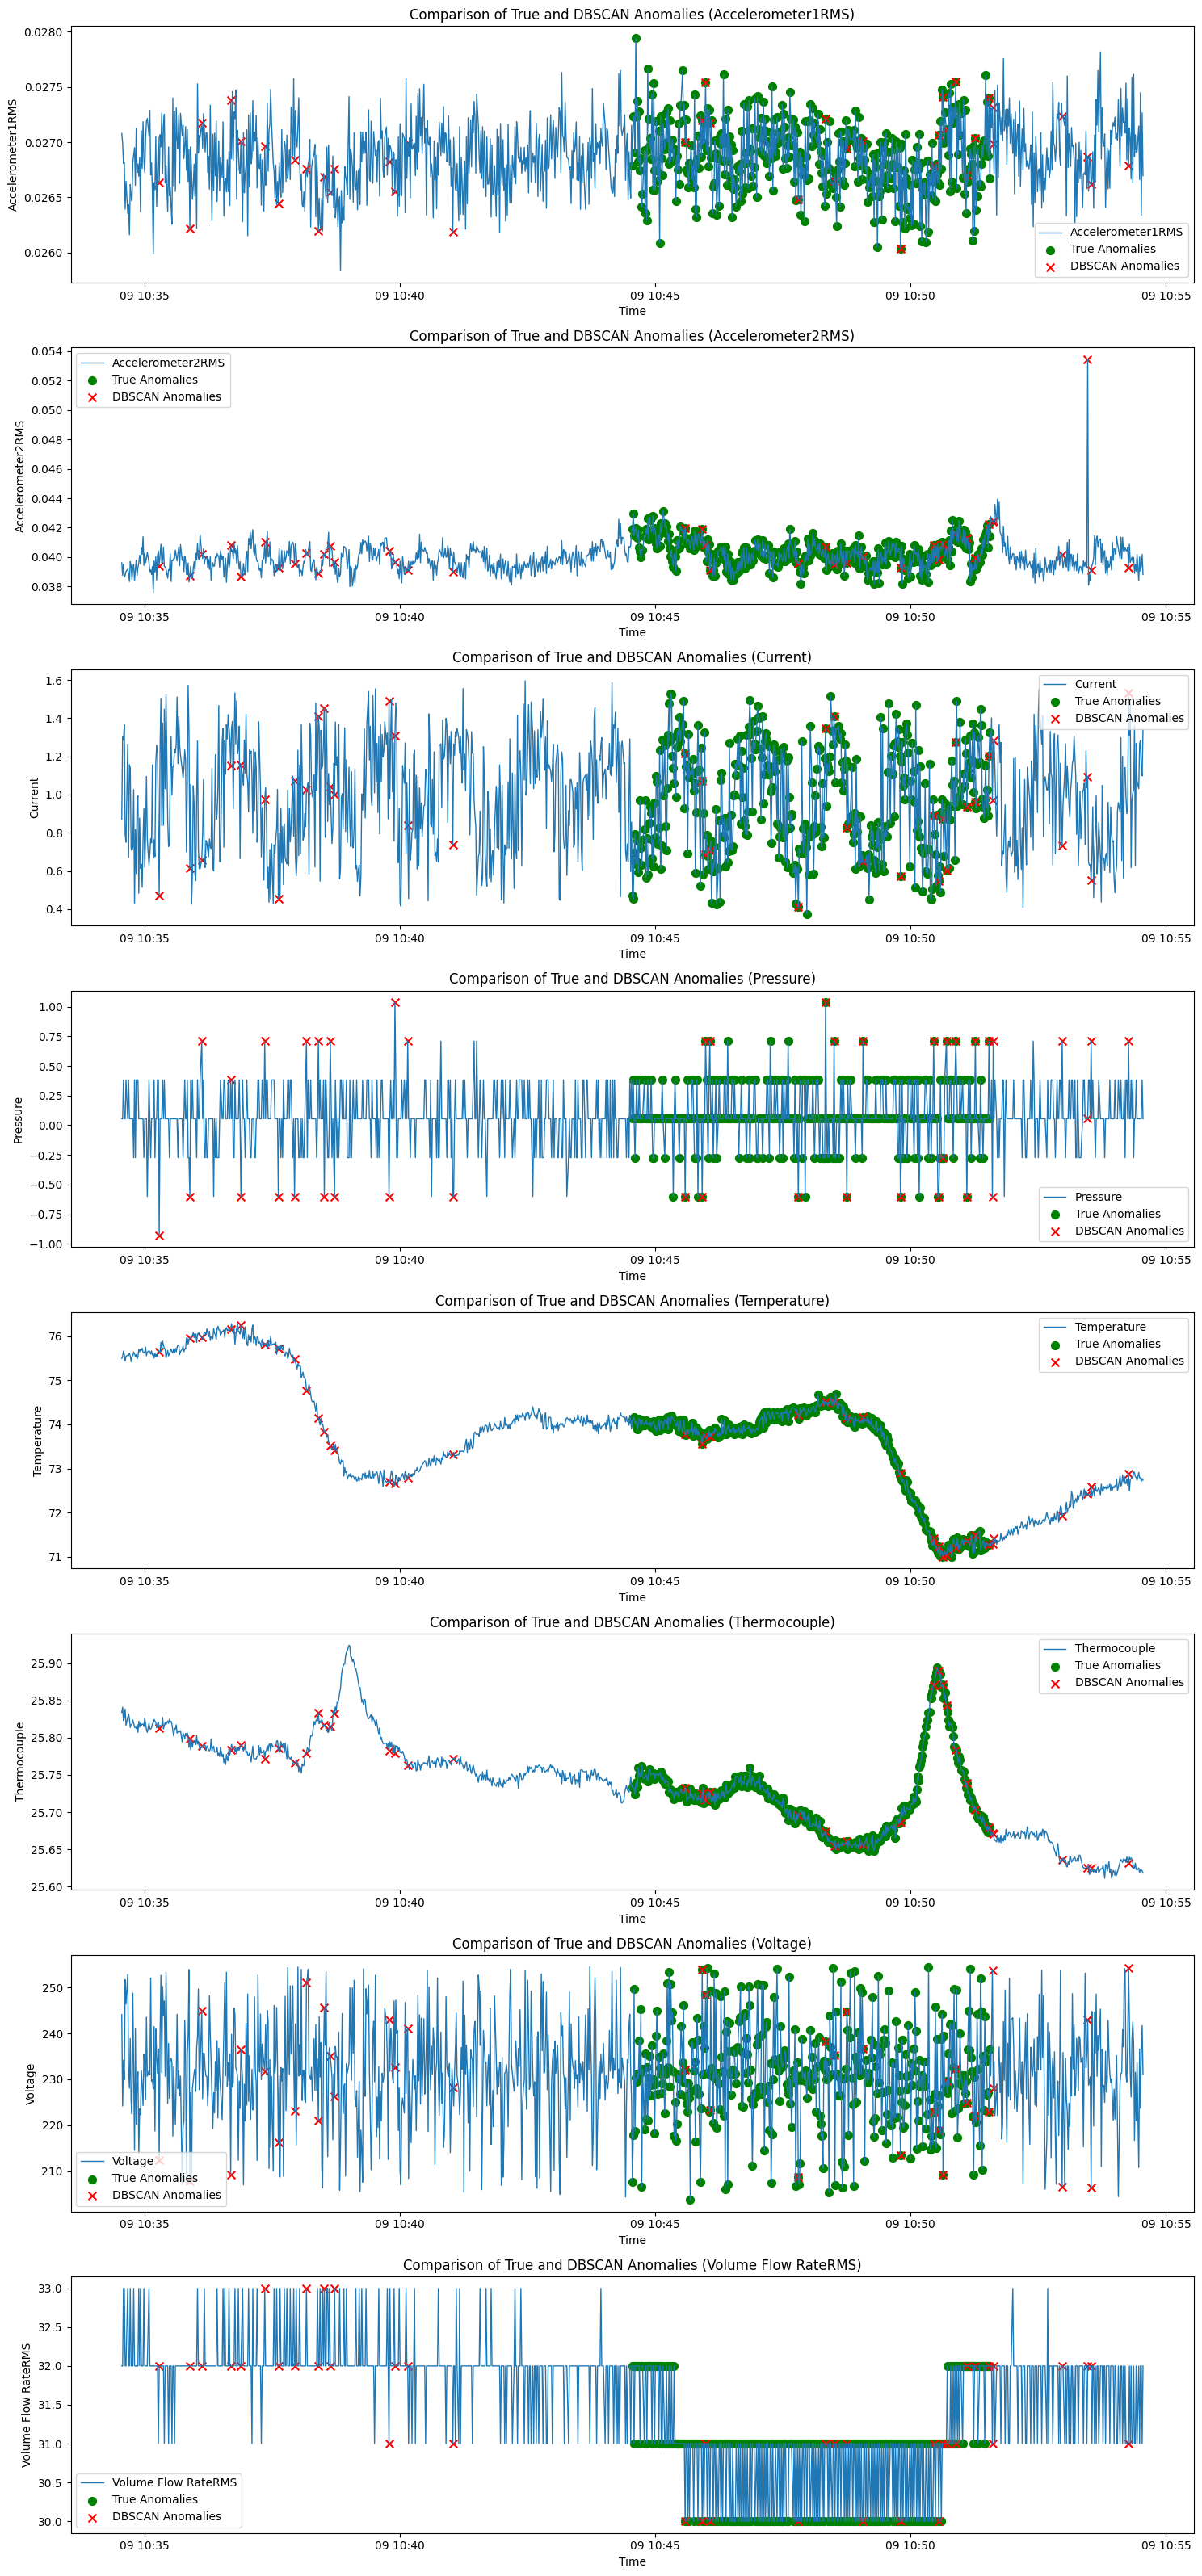

In [24]:
# Visualization

features_to_plot = train_numerical_columns

plt.figure(figsize=(15, len(features_to_plot) * 4))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(len(features_to_plot), 1, i)
    plt.plot(valve1_df['datetime'], valve1_df[feature], label=feature, linewidth=1)

    # Real anomaly
    plt.scatter(
        valve1_df['datetime'][true_anomalies],
        valve1_df[feature][true_anomalies],
        color='green',
        label='True Anomalies',
        s=50,
        marker='o'
    )

    # Predicted anomaly via DBSCAN
    plt.scatter(
        valve1_df['datetime'][test_anomalies],
        valve1_df[feature][test_anomalies],
        color='red',
        label='DBSCAN Anomalies',
        s=50,
        marker='x'
    )

    plt.title(f"Comparison of True and DBSCAN Anomalies ({feature})")
    plt.xlabel("Time")
    plt.ylabel(feature)
    plt.legend()

plt.tight_layout()
plt.show()


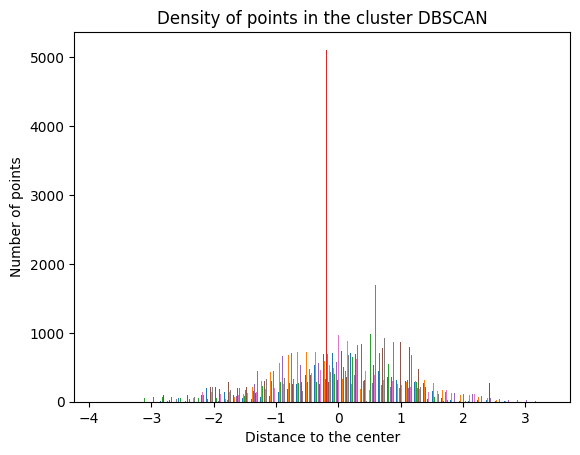

In [30]:
distances = dbscan.components_  # Main clusters
plt.hist(distances, bins=50)
plt.title("Density of points in the cluster DBSCAN")
plt.xlabel("Distance to the center")
plt.ylabel("Number of points")
plt.show()


In the analysis by clusters there are many peaks in the negative zone, which. in general also indicates noise and low quality of detection of possible anomalies

Running DBSCAN on test data allowed us to pick our approximate parameters, but gave fairly low intolerance results on the test data.

# Reconstruction-based method

In [34]:
def create_sequences_lstm(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length + 1):
        seq = data[i : i + sequence_length]
        sequences.append(seq)
    return np.array(sequences)

Shape of scaled_data: (9405, 8)
Shape of x_train: (9356, 50, 8)
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - loss: 1.0729 - val_loss: 0.9922
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 1.0462 - val_loss: 0.9142
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 0.7768 - val_loss: 0.8292
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.7012 - val_loss: 0.7775
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.6464 - val_loss: 0.7606
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.6201 - val_loss: 0.7485
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.5925 - val_loss: 0.7392
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.5840 - val_loss: 0.7390
Epoch 9/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.5786 - val_loss: 0.7378
Epoch 10/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.5614 - val_loss: 0.7313


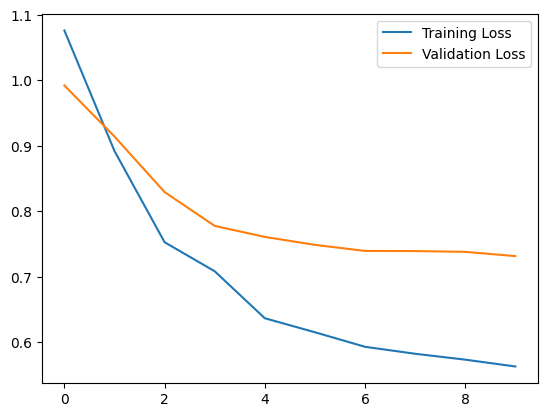

In [35]:
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


train_numerical_columns = ['Accelerometer1RMS', 'Accelerometer2RMS', 'Current',
                           'Pressure', 'Temperature', 'Thermocouple', 'Voltage',
                           'Volume Flow RateRMS']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[train_numerical_columns])
print(f"Shape of scaled_data: {scaled_data.shape}")

sequence_length = 50
x_train = create_sequences_lstm(scaled_data, sequence_length)
print(f"Shape of x_train: {x_train.shape}")

# Parameters
latent_dim = 16
timesteps = x_train.shape[1]
features = x_train.shape[2]
dropout_rate = 0.2  # Dropout

# Model with regularization
model = Sequential([
    LSTM(latent_dim, activation="relu", input_shape=(timesteps, features),
         return_sequences=False, dropout=dropout_rate, recurrent_dropout=dropout_rate),
    RepeatVector(timesteps),
    LSTM(latent_dim, activation="relu", return_sequences=True,
         dropout=dropout_rate, recurrent_dropout=dropout_rate),
    TimeDistributed(Dense(features))
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss="mse")

# Model training
history = model.fit(x_train, x_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()


293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step


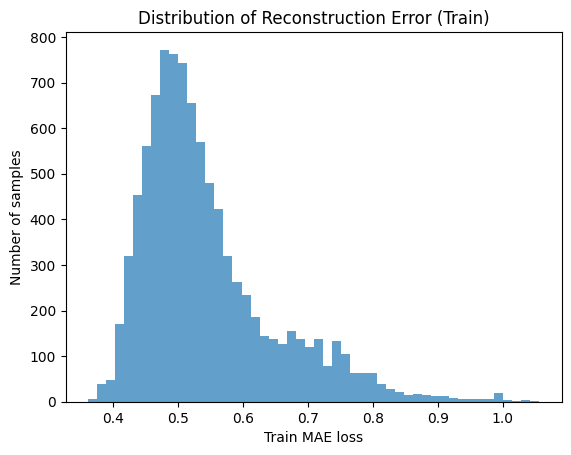

Reconstruction error threshold: 0.7579047643941357
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


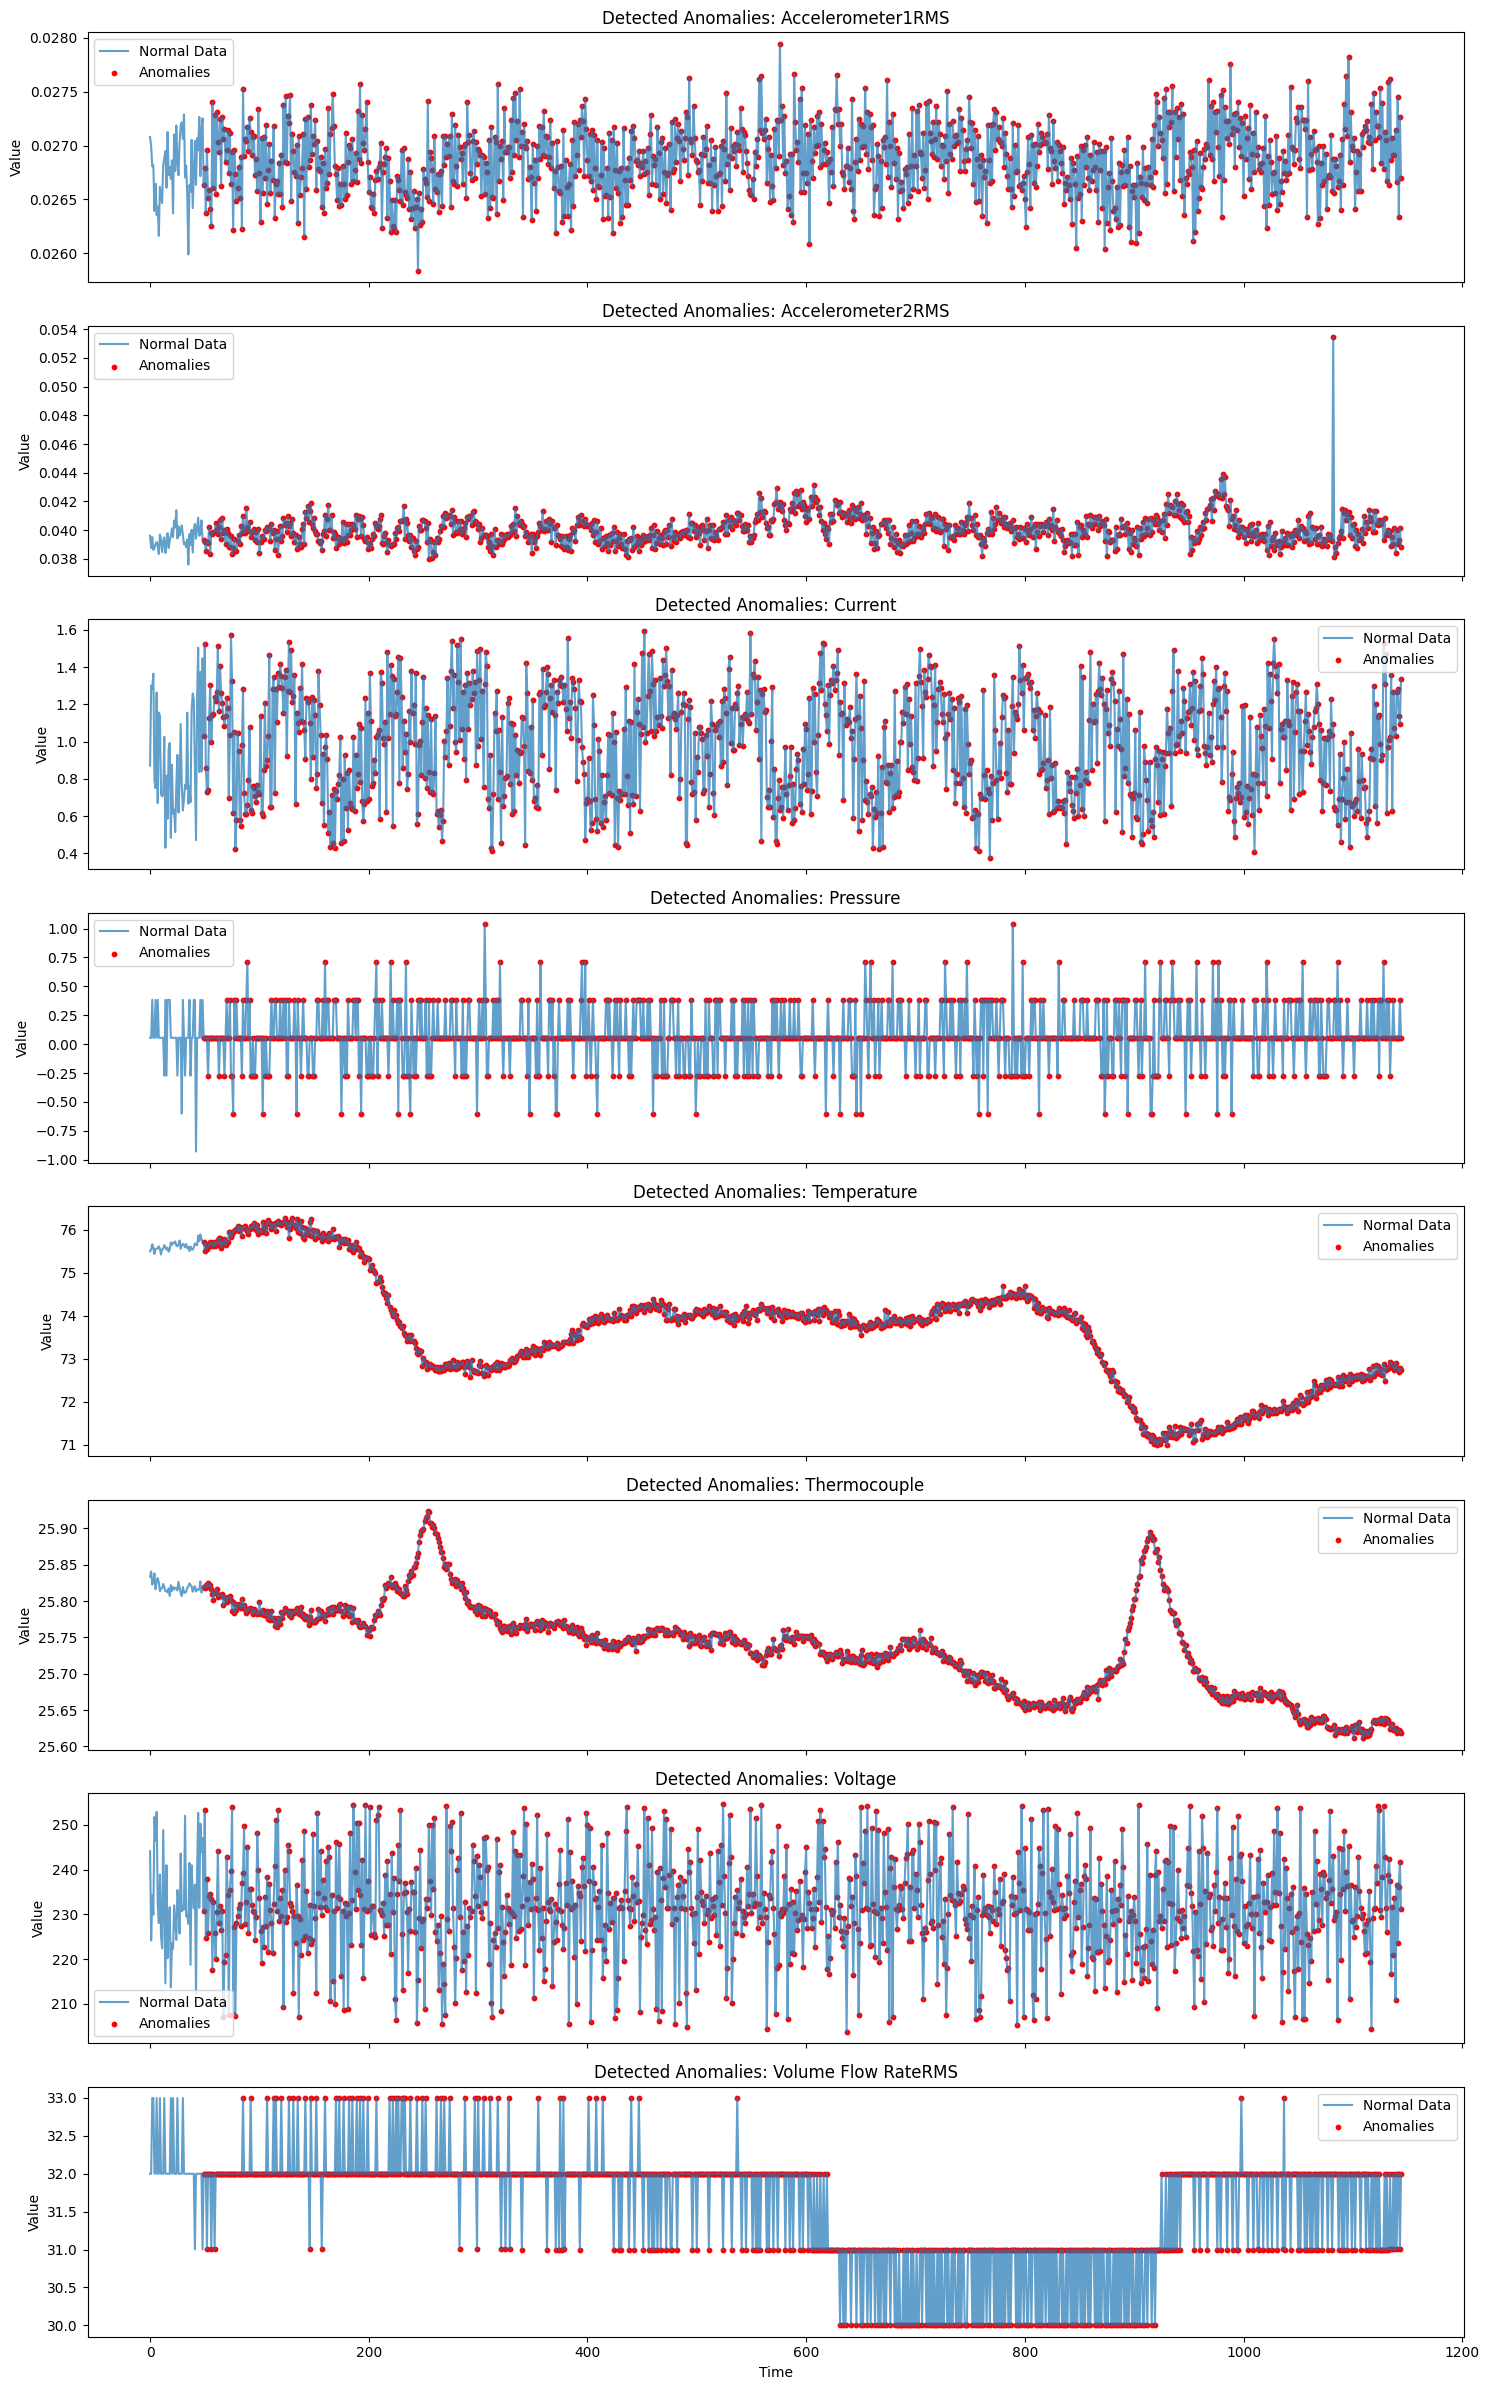

In [36]:
# Predictions for train data
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=(1, 2))

plt.hist(train_mae_loss, bins=50, alpha=0.7)
plt.xlabel("Train MAE loss")
plt.ylabel("Number of samples")
plt.title("Distribution of Reconstruction Error (Train)")
plt.show()

threshold = np.percentile(train_mae_loss, 95)  # 95 percentile
print("Reconstruction error threshold:", threshold)

scaled_test_data = scaler.transform(valve1_df[train_numerical_columns])
sequence_length = 50
x_test = create_sequences_lstm(scaled_test_data, sequence_length)

# Predictions for test data
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=(1, 2))

anomalies = test_mae_loss > threshold

# Indices of anomalies
anomalous_indices = np.arange(sequence_length - 1, len(valve1_df))[anomalies]

# Visualization
fig, axes = plt.subplots(len(train_numerical_columns), 1, figsize=(15, 3 * len(train_numerical_columns)), sharex=True)

for i, column in enumerate(train_numerical_columns):
    axes[i].plot(valve1_df.index, valve1_df[column], label='Normal Data', alpha=0.7)
    axes[i].scatter(
        valve1_df.iloc[anomalous_indices].index,
        valve1_df.iloc[anomalous_indices][column],
        color='red', label='Anomalies', s=10
    )
    axes[i].set_title(f'Detected Anomalies: {column}')
    axes[i].set_ylabel('Value')
    axes[i].legend()

plt.xlabel('Time')
plt.tight_layout()
plt.show()


In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

true_anomalies_lstm = valve1_df['anomaly'] == 1  # True for anomalies, False for normal

true_anomalies_lstm = true_anomalies_lstm[sequence_length - 1:]
predicted_anomalies_lstm = test_mae_loss > threshold  # Logical massive True/False

# Metrics
precision_lstm = precision_score(true_anomalies_lstm, predicted_anomalies_lstm)
recall_lstm = recall_score(true_anomalies_lstm, predicted_anomalies_lstm)
f1_lstm = f1_score(true_anomalies_lstm, predicted_anomalies_lstm)

print(f"Precision (LSTM): {precision_lstm}")
print(f"Recall (LSTM): {recall_lstm}")
print(f"F1 Score (LSTM): {f1_lstm}")


Precision (LSTM): 0.36678832116788324
Recall (LSTM): 1.0
F1 Score (LSTM): 0.5367156208277704


Anomaly detection failed, recall = 1.0, need to try CNN or other autoencoders